# **Análise de inadimplência baseada em dados de uma instituição financeira**

## 1\. Exploração de Dados

Os dados estão no formato CSV e contém informações sobre clientes de uma instituição financeira. Em especial, estamos interessados em explicar a segunda coluna, chamada de **default**, que indica se um cliente é adimplente(`default = 0`), ou inadimplente (`default = 1`), ou seja, queremos entender o porque um cliente deixa de honrar com suas dívidas baseado no comportamento de outros atributos, como salário, escolaridade e movimentação financeira. Uma descrição completa dos atributos está abaixo.



| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |



Vamos começar lendos os dados num dataframe `pandas`.

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('base_dados.csv', na_values='na')

In [6]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


Com o dados em mãos, vamos conhecer um pouco melhor a estrutura do nosso conjunto de dados.

### **2.1. Estrutura** 

In [7]:
df.shape # retorna uma tupla (qtd linhas, qtd colunas)

(10127, 16)

In [8]:
df[df['default'] == 0].shape

(8500, 16)

In [9]:
df[df['default'] == 1].shape

(1627, 16)

In [10]:
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

In [11]:
print(f"A proporcão clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


### **2.2. Schema** 

In [12]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


 - Colunas e seus respectivos tipos de dados.

In [13]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

 - Atributos **categóricos**.

In [14]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


 - Atributos **numéricos**.

In [15]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


### **2.3. Dados faltantes** 

Dados faltantes podem ser:

 - Vazios (`""`);
 - Nulos (`None`);
 - Não disponíveis ou aplicaveis (`na`, `NA`, etc.);
 - Não numérico (`nan`, `NaN`, `NAN`, etc).

In [16]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


Podemos verificar quais colunas possuem dados faltantes.

In [17]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

 - A função abaixo levanta algumas estatisticas sobre as colunas dos dados faltantes.

In [18]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [19]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [20]:
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [21]:
stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


## 3\. Transformação e limpeza de dados

Agora que conhecemos melhor a natureza do nosso conjunto de dados, vamos conduzir uma atividade conhecida como *data wrangling* que consiste na transformação e limpeza dos dados do conjunto para que possam ser melhor analisados. Em especial, vamos remover:

 - Corrigir o *schema* das nossas colunas;
 - Remover os dados faltantes.

### **3.1. Correção de schema** 

Na etapa de exploração, notamos que as colunas **limite_credito** e **valor_transacoes_12m** estavam sendo interpretadas como colunas categóricas (`dtype = object`).

In [22]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [23]:
df[['limite_credito', 'valor_transacoes_12m']].head()

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


Vamos criar uma função `lambda` para limpar os dados. Mas antes, vamos testar sua aplicação através do método funcional `map`:

In [24]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


Com a função `lambda` de limpeza pronta, basta aplica-la nas colunas de interesse.

In [25]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

Vamos descrever novamente o *schema*:

In [26]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

 - Atributos **categóricos**.

In [27]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


 - Atributos **numéricos**.

In [28]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


### **3.2. Remoção de dados faltantes** 

Como o pandas está ciente do que é um dados faltante, a remoção das linhas problemáticas é trivial.

In [29]:
df.dropna(inplace=True)

Vamos analisar a estrutura dos dados novamente.

In [30]:
df.shape

(7081, 16)

In [31]:
df[df['default'] == 0].shape

(5968, 16)

In [32]:
df[df['default'] == 1].shape

(1113, 16)

In [33]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

In [34]:
print(f"A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


## 4\. Visualização de dados

Os dados estão prontos, vamos criar diversas visualizações para correlacionar variáveis explicativas com a variável resposta para buscar entender qual fator leva um cliente a inadimplencia. E para isso, vamos sempre comparar a base com todos os clientes com a base de adimplentes e inadimplentes.

Começamos então importando os pacotes de visualização e separando os clientes adimplentes e inadimplentes 

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [36]:
df_adimplente = df[df['default'] == 0]

In [37]:
df_inadimplente = df[df['default'] == 1]

### **4.1. Visualizações categóricas** 

Nesta seção, vamos visualizar a relação entre a variável resposta **default** com os atributos categóricos.

In [38]:
df.select_dtypes('object').head()

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


Função para gerar gráficos

In [39]:
def graficar(coluna: str, titulos_df: str):

  eixo = 0
  max_y = 0
  max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

  figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

  for dataframe in [df, df_adimplente, df_inadimplente]:

    df_to_plot = dataframe[coluna].value_counts().to_frame()
    df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
    df_to_plot[coluna] = df_to_plot.index
    df_to_plot.sort_values(by=[coluna], inplace=True)
    df_to_plot.sort_values(by=[coluna])

    f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
    f.set(title=titulos_df[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

  figura.show()

 - Escolaridade

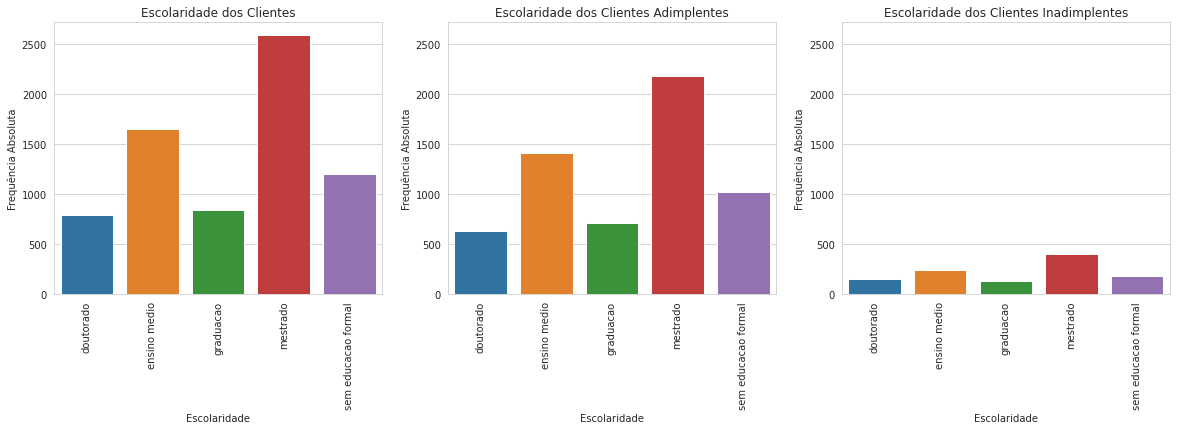

In [40]:
graficar(coluna = 'escolaridade', titulos_df =  ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes'])

 - Salário Anual

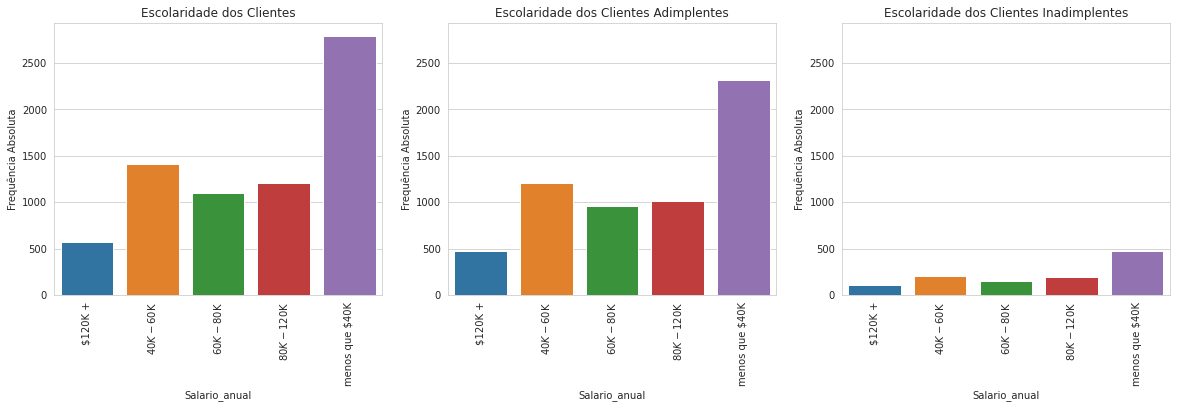

In [41]:
graficar(coluna = 'salario_anual', titulos_df =  ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes'])

 - Tipo de cartão

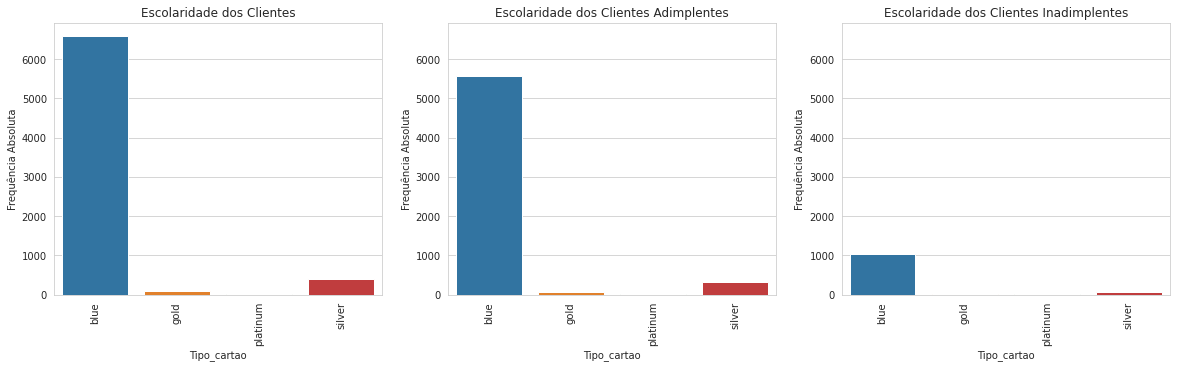

In [42]:
graficar(coluna = 'tipo_cartao', titulos_df =  ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes'])

- 

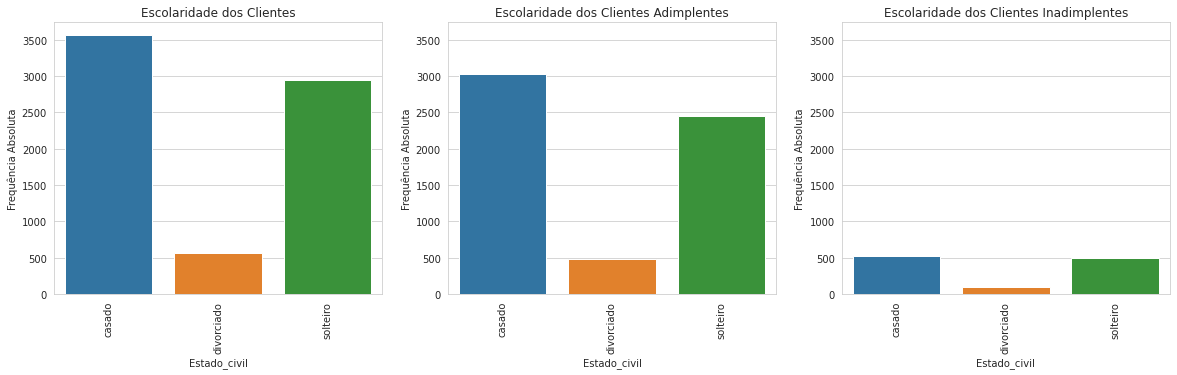

In [43]:
graficar(coluna = 'estado_civil', titulos_df =  ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes'])

Nenhuma das variáveis categóricas apresentam comportamento que indique uma possível inadimplência.

### **4.2. Visualizações numéricas** 

Nesta seção, vamos visualizar a relação entre a variável resposta **default** com os atributos numéricos.

In [44]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head()

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


Função para gerar histogramas e boxplot

In [45]:
def gera_histograma(coluna: str, titulos_df: str):
  
  eixo = 0
  max_y = 0
  figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

  for dataframe in [df, df_adimplente, df_inadimplente]:

    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos_df[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

  figura.show()

def gera_violinplot(coluna: str, titulos_df: str):
  
  eixo = 0
  figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

  for dataframe in [df, df_adimplente, df_inadimplente]:

    f = sns.violinplot(x=coluna, data=dataframe, ax=eixos[eixo], scale = 'count')
    f.set(title=titulos_df[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    eixo += 1

  figura.show()

 - Quantidade de Transações nos Últimos 12 Meses

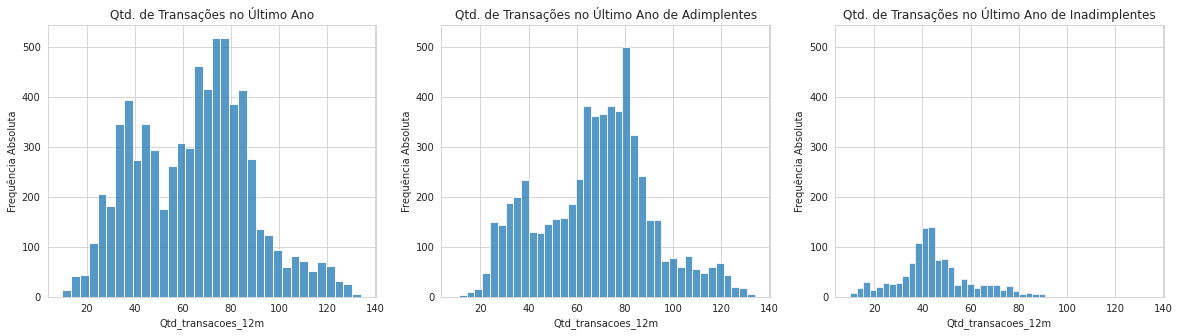

In [46]:
gera_histograma(coluna = 'qtd_transacoes_12m', titulos_df = ['Qtd. de Transações no Último Ano', 
                                                            'Qtd. de Transações no Último Ano de Adimplentes', 
                                                            'Qtd. de Transações no Último Ano de Inadimplentes'])

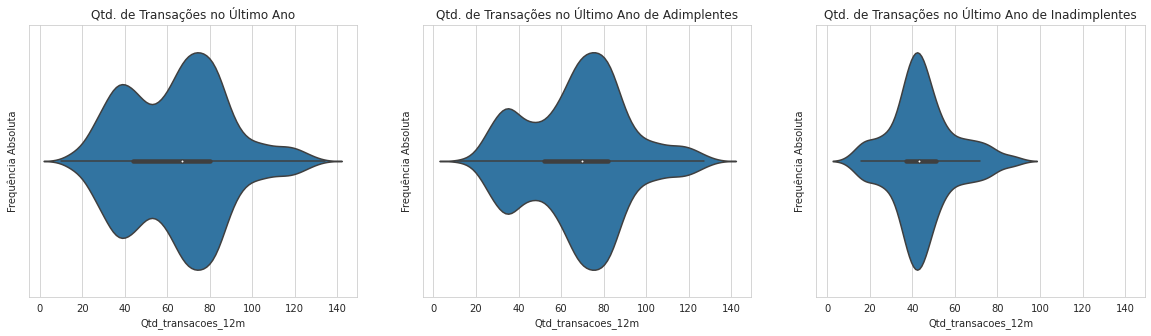

In [47]:
gera_violinplot(coluna = 'qtd_transacoes_12m', titulos_df = ['Qtd. de Transações no Último Ano', 
                                                            'Qtd. de Transações no Último Ano de Adimplentes', 
                                                            'Qtd. de Transações no Último Ano de Inadimplentes'])

 - Valor das Transações nos Últimos 12 Meses

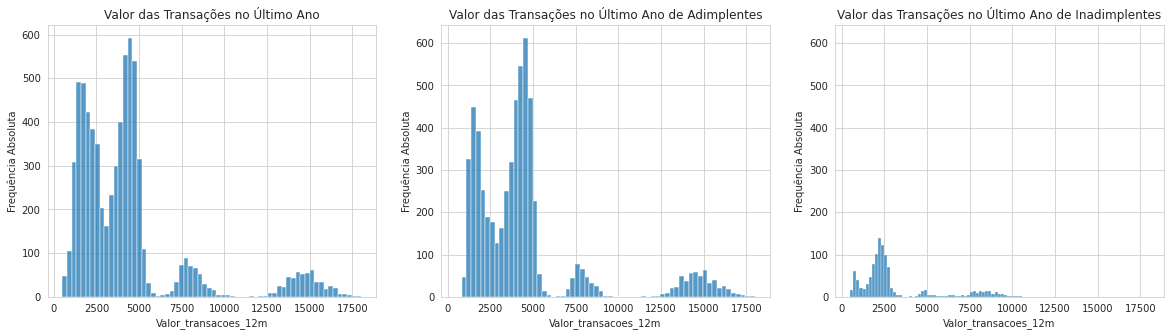

In [48]:
gera_histograma(coluna = 'valor_transacoes_12m', titulos_df = ['Valor das Transações no Último Ano', 
                                                              'Valor das Transações no Último Ano de Adimplentes', 
                                                              'Valor das Transações no Último Ano de Inadimplentes'])

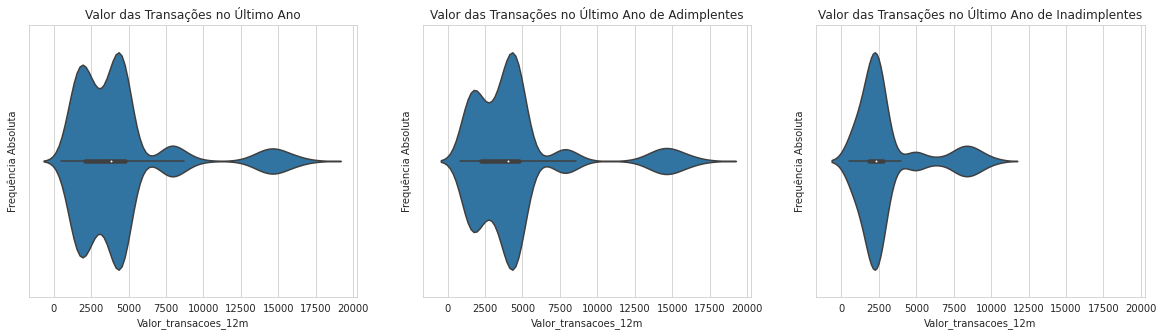

In [49]:
gera_violinplot(coluna = 'valor_transacoes_12m', titulos_df = ['Valor das Transações no Último Ano', 
                                                              'Valor das Transações no Último Ano de Adimplentes', 
                                                              'Valor das Transações no Último Ano de Inadimplentes'])

- Quantidade de dependentes

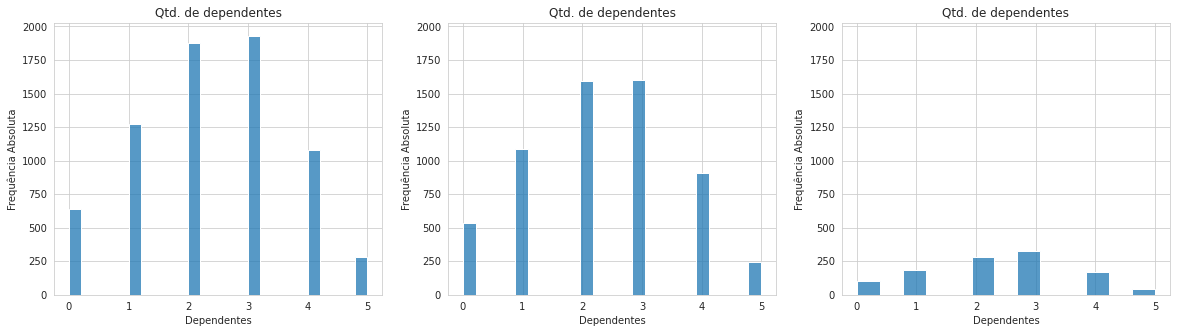

In [50]:
gera_histograma(coluna = 'dependentes', titulos_df = ['Qtd. de dependentes', 
                                                              'Qtd. de dependentes', 
                                                              'Qtd. de dependentes'])

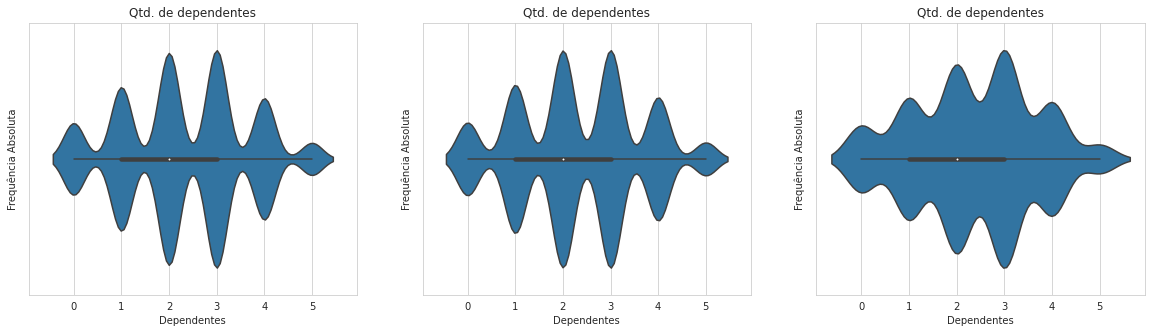

In [51]:
gera_violinplot(coluna = 'dependentes', titulos_df = ['Qtd. de dependentes', 
                                                              'Qtd. de dependentes', 
                                                              'Qtd. de dependentes'])

- Meses de relacionamento

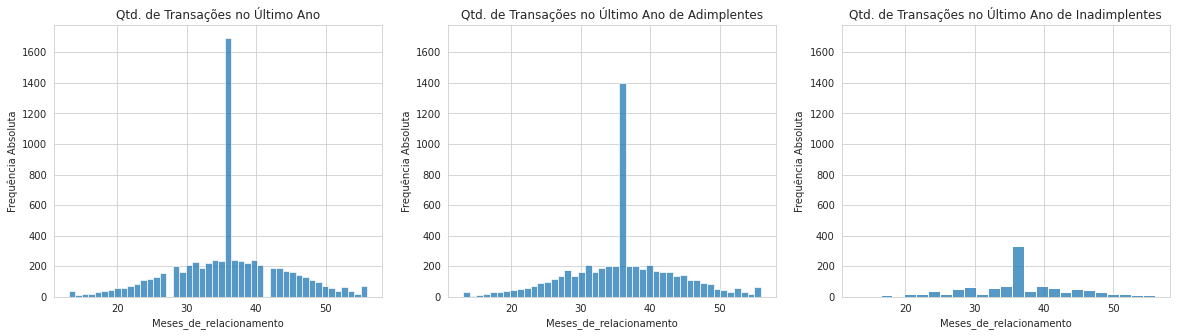

In [52]:
gera_histograma(coluna = 'meses_de_relacionamento', titulos_df = ['Qtd. de Meses de relacionamento', 
                                                              'Qtd. de Meses de relacionamento', 
                                                              'Qtd. de Meses de relacionamento'])

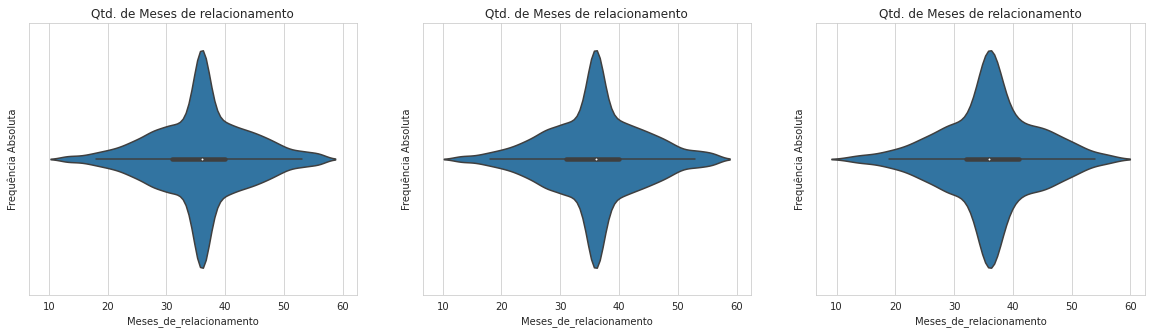

In [57]:
gera_violinplot(coluna = 'meses_de_relacionamento', titulos_df = ['Qtd. de Meses de relacionamento', 
                                                              'Qtd. de Meses de relacionamento', 
                                                              'Qtd. de Meses de relacionamento'])

- Quantidade de produtos adquiridos

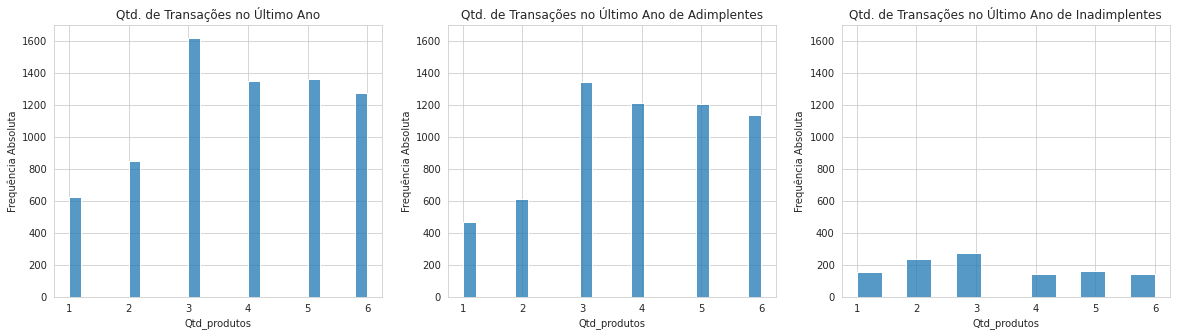

In [53]:
gera_histograma(coluna = 'qtd_produtos', titulos_df = ['Qtd. de produtos adquiridos', 
                                                              'Qtd. de produtos adquiridos', 
                                                              'Qtd. de produtos adquiridos'])

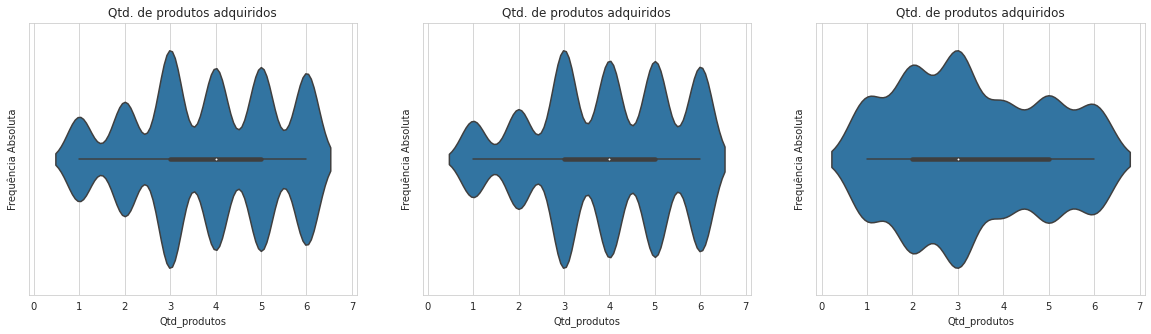

In [58]:
gera_violinplot(coluna = 'qtd_produtos', titulos_df = ['Qtd. de produtos adquiridos', 
                                                              'Qtd. de produtos adquiridos', 
                                                              'Qtd. de produtos adquiridos'])

- Iterações nos últimos 12 meses

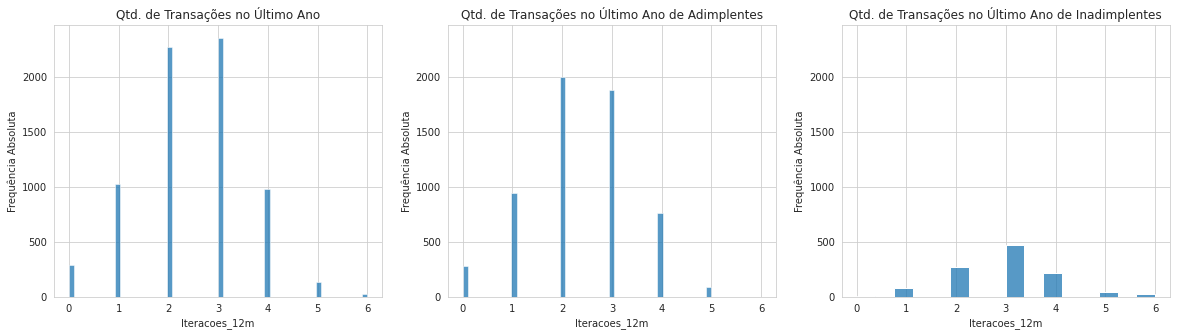

In [54]:
gera_histograma(coluna = 'iteracoes_12m', titulos_df = ['Qtd. de iterações no Último Ano', 
                                                              'Qtd. de iterações no Último Ano de Adimplentes', 
                                                              'Qtd. de iterações no Último Ano de Inadimplentes'])

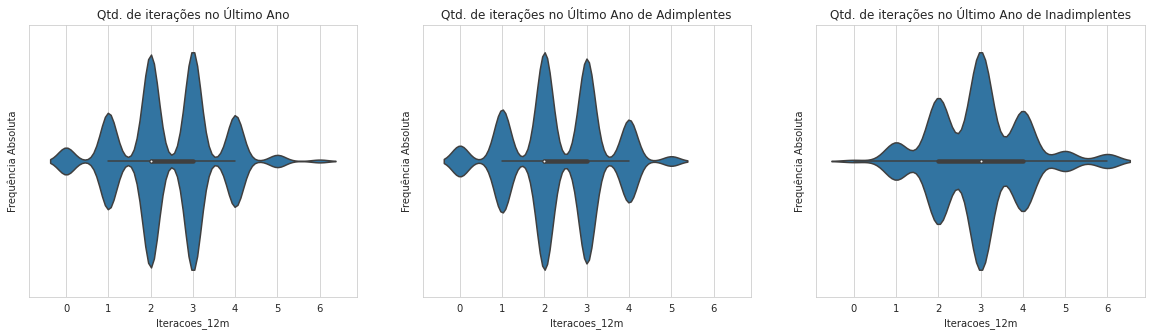

In [59]:
gera_violinplot(coluna = 'iteracoes_12m', titulos_df = ['Qtd. de iterações no Último Ano', 
                                                              'Qtd. de iterações no Último Ano de Adimplentes', 
                                                              'Qtd. de iterações no Último Ano de Inadimplentes'])

- Limite de crédito

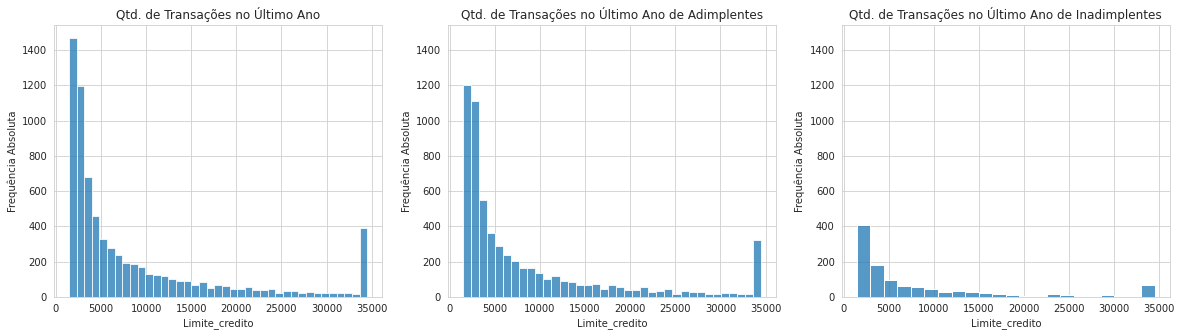

In [55]:
gera_histograma(coluna = 'limite_credito', titulos_df = ['Limite de crédito', 
                                                              'Limite de crédito de Adimplentes', 
                                                              'Limite de crédito de Inadimplentes'])

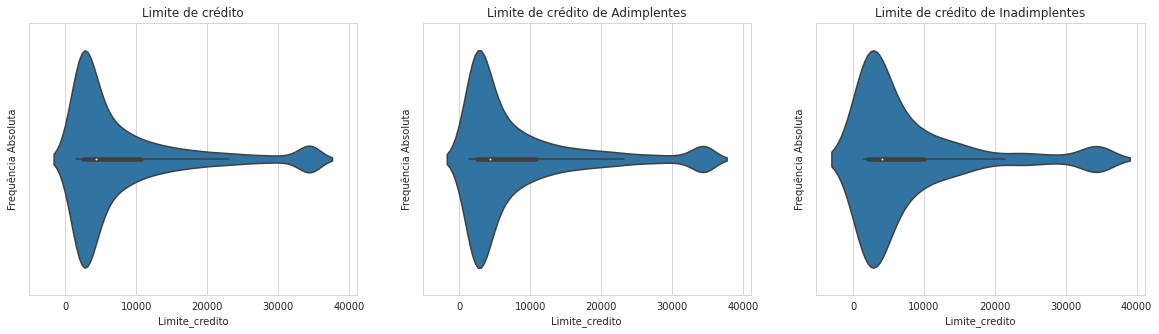

In [60]:
gera_violinplot(coluna = 'limite_credito', titulos_df = ['Limite de crédito', 
                                                              'Limite de crédito de Adimplentes', 
                                                              'Limite de crédito de Inadimplentes'])

Aqui podemos ressaltar que as variáveis iterações nos últimos 12 meses, quantidade de produtos, quantidade de dependentes. valor de transação nos últimos 12 meses e quantidade de transações nos últimos 12 meses aparentam influenciar nossa variável objetivo.





 - Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses

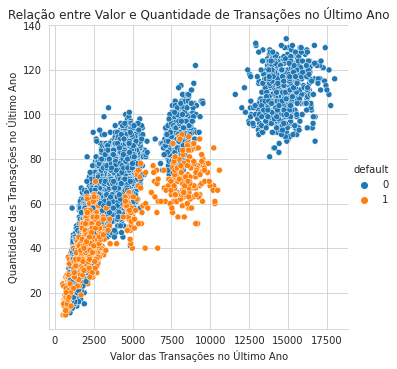

In [62]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano', 
    xlabel='Valor das Transações no Último Ano', 
    ylabel='Quantidade das Transações no Último Ano'
  )

- Valor de Transações nos Últimos 12 Meses x Quantidade de dependentes

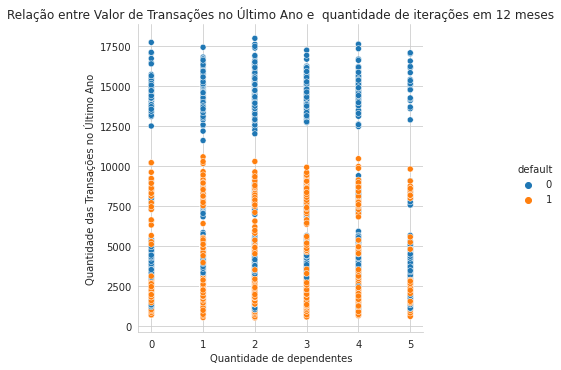

In [70]:
f = sns.relplot(x='dependentes', y='valor_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor de Transações no Último Ano e  quantidade de iterações em 12 meses', 
    xlabel='Quantidade de dependentes', 
    ylabel='Valor das Transações no Último Ano'
  )

Podemos notar que um grupo com maior valor de transações está sempre dentro do default = 0. Vamos tentar filtrá-los para entender melhor os inadimplentes.

- Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses para valores de transação menor que 12000

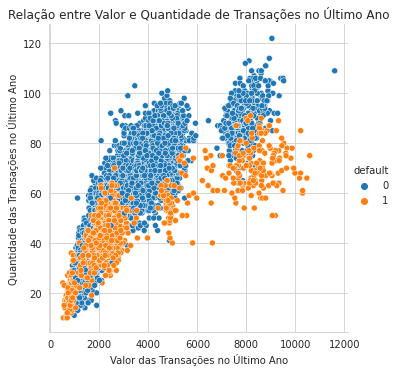

In [73]:
df_valor_filtrado = df.query('valor_transacoes_12m < 12000')

f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df_valor_filtrado, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano', 
    xlabel='Valor das Transações no Último Ano', 
    ylabel='Quantidade das Transações no Último Ano'
  )

- Valor de Transações nos Últimos 12 Meses x Quantidade de dependentes para valores de transação menor que 12000

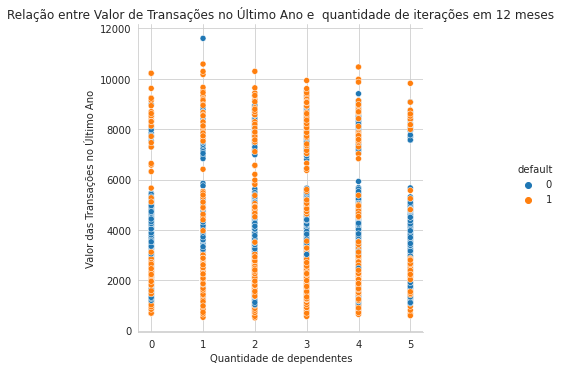

In [74]:
f = sns.relplot(x='dependentes', y='valor_transacoes_12m', data=df_valor_filtrado, hue='default')
_ = f.set(
    title='Relação entre Valor de Transações no Último Ano e  quantidade de iterações em 12 meses', 
    xlabel='Quantidade de dependentes', 
    ylabel='Valor das Transações no Último Ano'
  )

- Valor de Transações nos Últimos 12 Meses x Quantidade de iterações nos Últimos 12 Meses para valores de transação menor que 12000

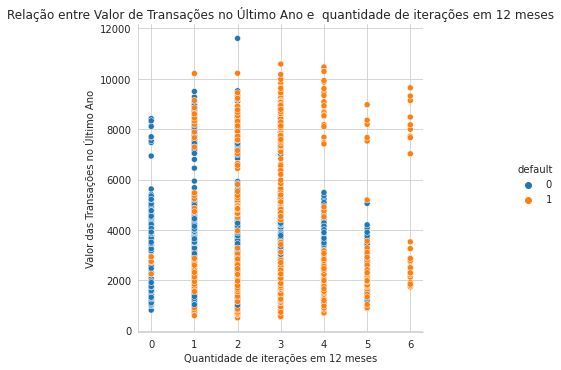

In [75]:
f = sns.relplot(x='iteracoes_12m', y='valor_transacoes_12m', data=df_valor_filtrado, hue='default')
_ = f.set(
    title='Relação entre Valor de Transações no Último Ano e  quantidade de iterações em 12 meses', 
    xlabel='Quantidade de iterações em 12 meses', 
    ylabel='Valor das Transações no Último Ano'
  )

- Quantidade de Transações nos Últimos 12 Meses x Quantidade de iterações nos Últimos 12 Meses para valores de transação menor que 12000

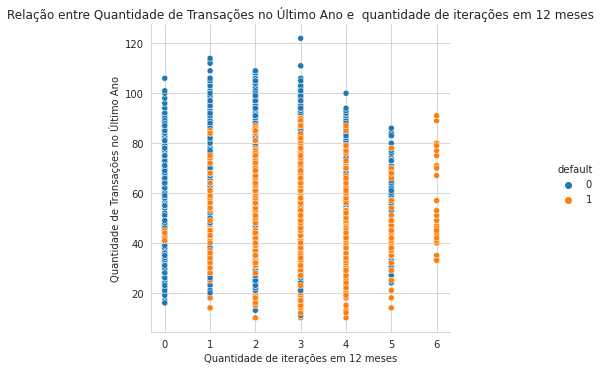

In [76]:
f = sns.relplot(x='iteracoes_12m', y='qtd_transacoes_12m', data=df_valor_filtrado, hue='default')
_ = f.set(
    title='Relação entre Quantidade de Transações no Último Ano e  quantidade de iterações em 12 meses', 
    xlabel='Quantidade de iterações em 12 meses', 
    ylabel='Quantidade de Transações no Último Ano'
  )

- Valor de Transações nos Últimos 12 Meses x Quantidade de iterações nos Últimos 12 Meses para valores de transação menor que 12000

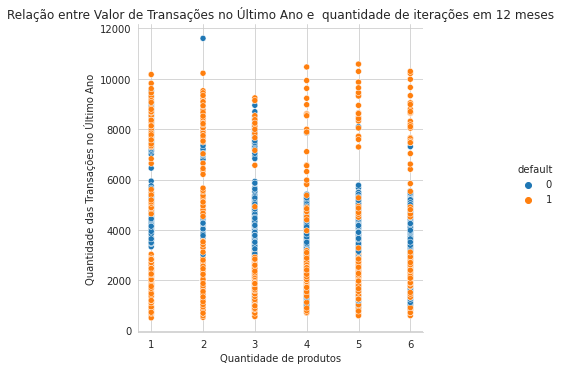

In [77]:
f = sns.relplot(x='qtd_produtos', y='valor_transacoes_12m', data=df_valor_filtrado, hue='default')
_ = f.set(
    title='Relação entre Valor de Transações no Último Ano e  quantidade de iterações em 12 meses', 
    xlabel='Quantidade de produtos', 
    ylabel='Quantidade das Transações no Último Ano'
  )

- Valor de Transações nos Últimos 12 Meses x Limite de crédito para valores de transação menor que *12000*

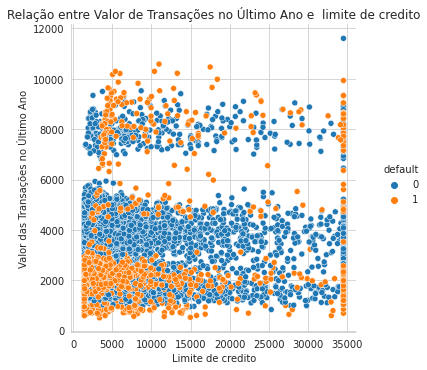

In [81]:
f = sns.relplot(x='limite_credito', y='valor_transacoes_12m', data=df_valor_filtrado, hue='default')
_ = f.set(
    title='Relação entre Valor de Transações no Último Ano e  limite de credito', 
    xlabel='Limite de credito', 
    ylabel='Valor das Transações no Último Ano'
  )

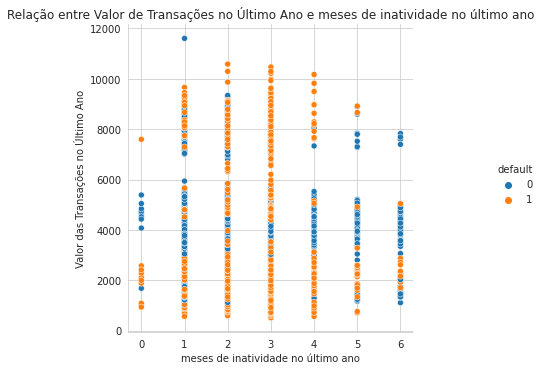

In [86]:
f = sns.relplot(x='meses_inativo_12m', y='valor_transacoes_12m', data=df_valor_filtrado, hue='default')
_ = f.set(
    title='Relação entre Valor de Transações no Último Ano e meses de inatividade no último ano', 
    xlabel='meses de inatividade no último ano', 
    ylabel='Valor das Transações no Último Ano'
  )

Devemos ficar atentos aos clientes com valores de transação menores que 12000, com grande número de iterações, limite a baixo de 15000 e inatividade maior que 2 meses no último ano. Temos de desenvolver campanhas de engajamento e de educação para incentivar o uso consciente. Fazendo o cliente mais feliz e saudável por mais tempo.